# Creations de figures et animations pour la sismologie
En utilisant la librairie TauP incluse dans Obspy (en Python, donc). 
Version de Python utilisée : 3.5

Le début du tutoriel est librement inspiré et traduit de la documentation de Obspy.taup, disponible ici: https://docs.obspy.org/packages/obspy.taup.html

In [2]:
%matplotlib inline 
#les figures s'affichent dans le notebook

# import statements
import numpy as np 
import matplotlib.pyplot as plt #for figures
from matplotlib.animation import FuncAnimation #for animations
from IPython.display import HTML

from obspy.taup import TauPyModel #TauP

Initialisation du modèle via tauP:

In [3]:
model = TauPyModel(model="iasp91")

Exemple d'utilisation: obtenir les temps d'arrivées en une station donnée. On peut préciser les phases qui nous intéressent, ou simplement obtenir toutes les arrivées d'ondes. 

In [4]:
arrivals = model.get_travel_times(source_depth_in_km=55,
                                  distance_in_degree=67,
                                  phase_list=["P", "PSPSPS"])
print(arrivals)

2 arrivals
	P phase arrival at 647.041 seconds
	PSPSPS phase arrival at 4752.659 seconds


Pour calculer les détails des rais, utiliser la fonction get_ray_paths(). L'output donne, pour chaque arrivée, un numpy array (un vecteur) qui contient les paramètres du rai, le temps, la distance et la profondeur. 

In [5]:
arrivals = model.get_ray_paths(50, 70, phase_list=["P", "PP"])
print(arrivals)

2 arrivals
	P phase arrival at 666.328 seconds
	PP phase arrival at 821.422 seconds


Vous pouvez aussi visualiser les rais en utilisant la fonction plot.

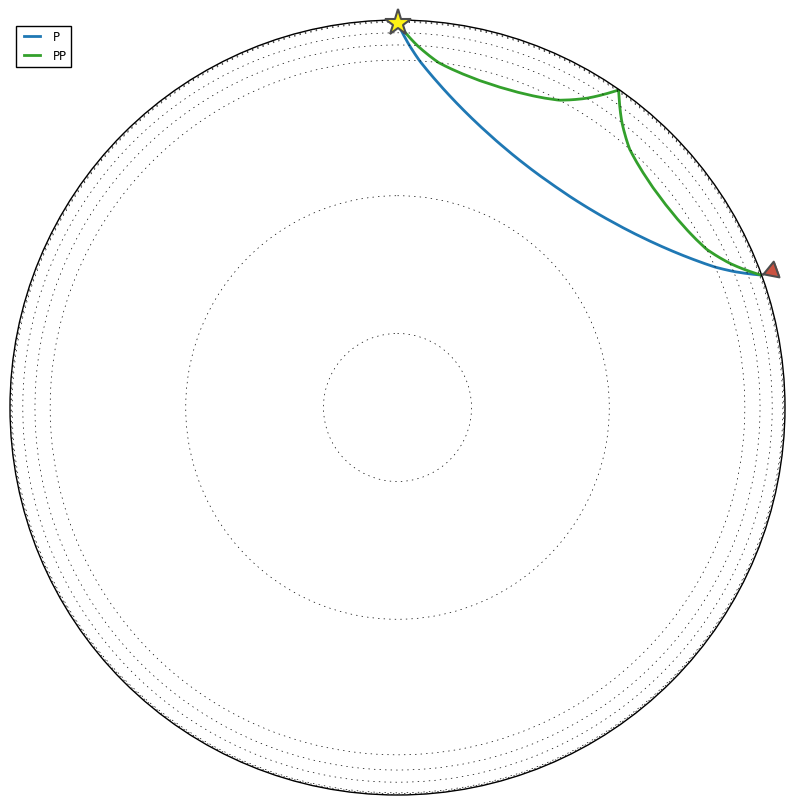

In [6]:
arrivals.plot() 

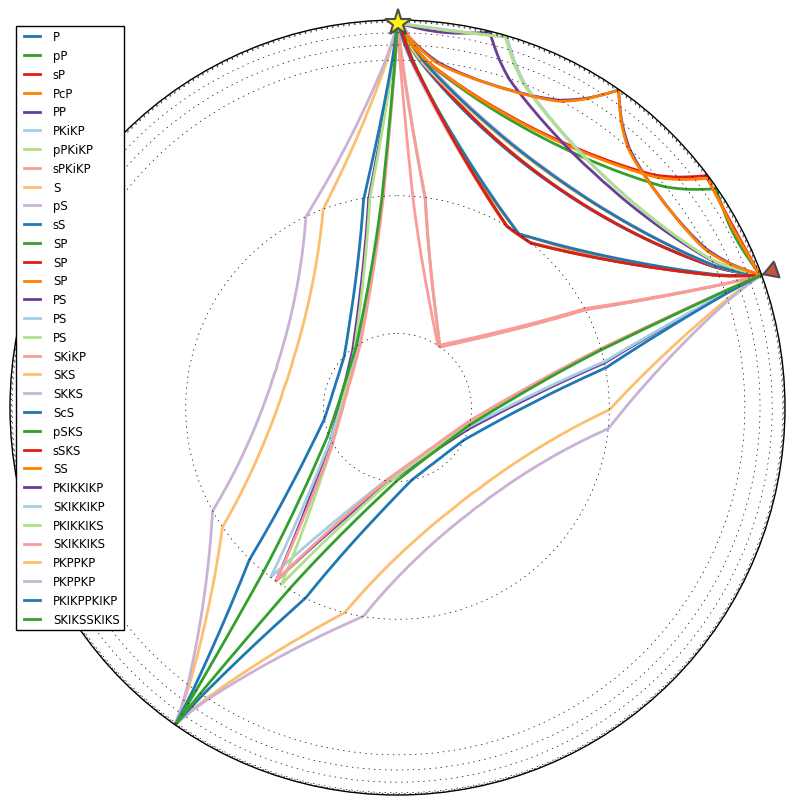

In [7]:
arrivals = model.get_ray_paths(50, 70)
arrivals.plot() 

6371.0


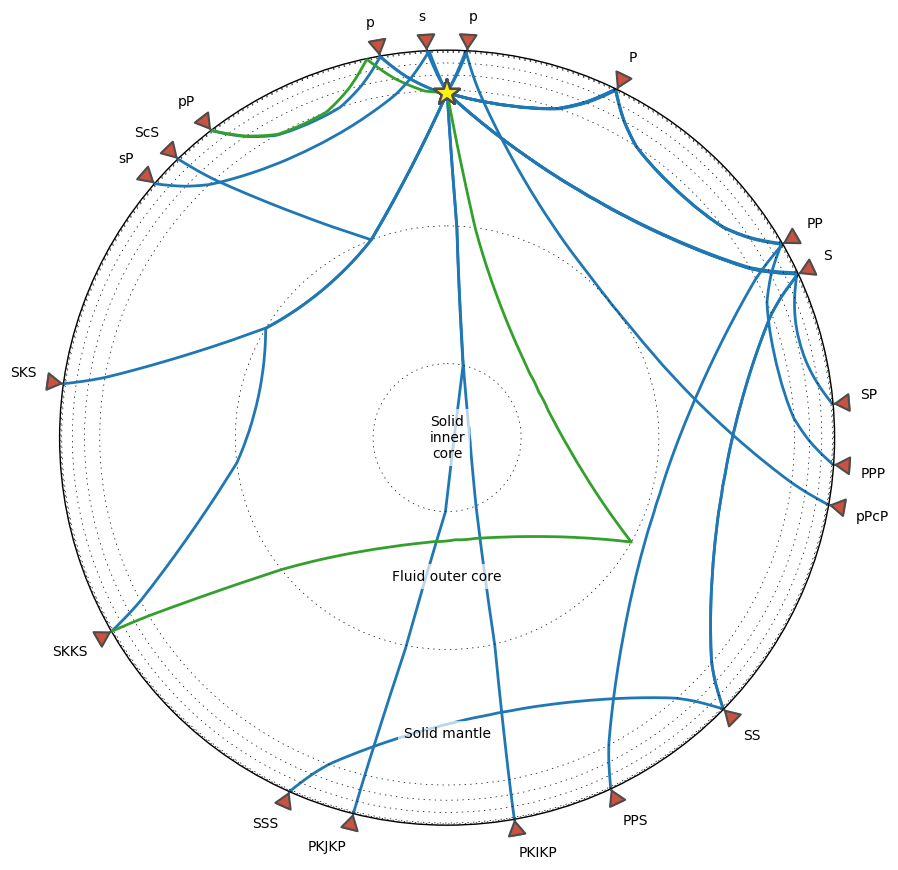

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from obspy.taup import TauPyModel


PHASES = [
    # Phase, distance
    # Right half
    ('P', 26),
    ('PP', 60),
    ('PPP', 94),
    ('PPS', 155),
    ('p', 3),
    ('pPcP', 100),
    ('PKIKP', 170),
    ('PKJKP', 194),
    ('S', 65),
    ('SP', 85),
    ('SS', 134.5),
    ('SSS', 204),
    # Left half
    ('p', -10),
    ('pP', -37.5),
    ('s', -3),
    ('sP', -49),
    ('ScS', -44),
    ('SKS', -82),
    ('SKKS', -120),
]

PLOT_ALL = [
    'SKKS',
]


model = TauPyModel(model='iasp91')
phase_name_radius = model.model.radius_of_planet * 1.1

# ax_right is used for paths plotted on the right half.
fig, ax_right = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax_right.set_theta_zero_location('N')
ax_right.set_theta_direction(-1)
# ax_left is used for paths plotted on the left half.
ax_left = fig.add_axes(ax_right.get_position(), projection='polar',
                       label='twin', frameon=False)
ax_left.set_theta_zero_location('N')
ax_left.set_theta_direction(+1)
ax_left.xaxis.set_visible(False)
ax_left.yaxis.set_visible(False)

# Plot all pre-determined phases
for phase, distance in PHASES:
    if distance < 0:
        realdist = -distance
        ax = ax_left
    else:
        realdist = distance
        ax = ax_right

    arrivals = model.get_ray_paths(700, realdist, phase_list=[phase])
    if not len(arrivals):
        print('FAIL', phase, distance)
        continue
    arrivals.plot(plot_type='spherical', plot_all=phase in PLOT_ALL,
                  legend=False, label_arrivals=True,
                  show=False, ax=ax)

# Annotate regions
ax_right.text(0, 0, 'Solid\ninner\ncore',
              horizontalalignment='center', verticalalignment='center',
              bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ocr = (model.model.radius_of_planet -
       (model.model.s_mod.v_mod.iocb_depth +
        model.model.s_mod.v_mod.cmb_depth) / 2)
ax_right.text(np.deg2rad(180), ocr, 'Fluid outer core',
              horizontalalignment='center',
              bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
mr = model.model.radius_of_planet - model.model.s_mod.v_mod.cmb_depth / 2
ax_right.text(np.deg2rad(180), mr, 'Solid mantle',
              horizontalalignment='center',
              bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
print(model.model.radius_of_planet)
plt.show()

FAIL P 180.0


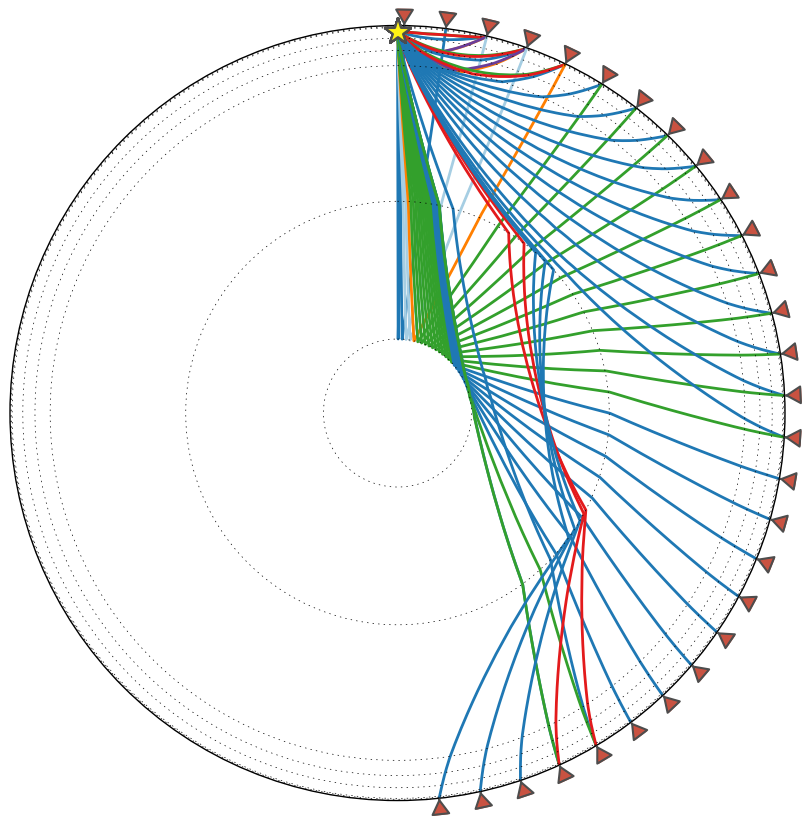

In [9]:
distances = np.linspace(1, 180, 30)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
phase = 'P'
for value in distances:
    arrivals = model.get_ray_paths(100, value, phase_list=['P', 'PKP', 'PKiKP'])
    if not len(arrivals):
        print('FAIL', phase, value)
        continue
    arrivals.plot(plot_type='spherical',
                  legend=False, label_arrivals=False,
                  show=False, ax=ax)
    

# Animations
Maintenant, passons aux animations!

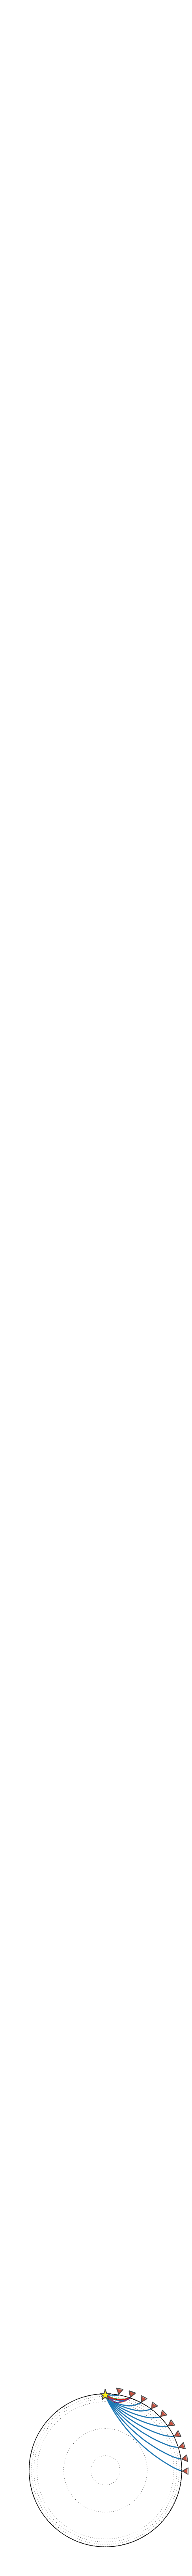

In [10]:
distances = np.linspace(10, 180, 20)
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
phases = ['P']
arrivals = model.get_ray_paths(100, 10, phase_list=phases)
axes = arrivals.plot(plot_type='spherical',
                  legend=False, label_arrivals=False,
                  show=False, ax=ax)
#print(type(ax.plot([],[])[0]))

def animate(i):
    #length = len(axes.lines)
    ##if length>0:
    #    for i in np.arange(length-1):
    #        axes.lines.remove(axes.lines[1])
    arrivals = model.get_ray_paths(100, distances[i], phase_list=phases)
    if not len(arrivals):
        pass
    else:      
        axes.add_artist(arrivals.plot(plot_type='spherical',
                  legend=False, label_arrivals=False,
                  show=False, ax=ax).lines[1])
    return axes


anim = FuncAnimation(fig, animate, np.arange(1, len(distances)),
                              interval=200, blit=False)
HTML(anim.to_html5_video())

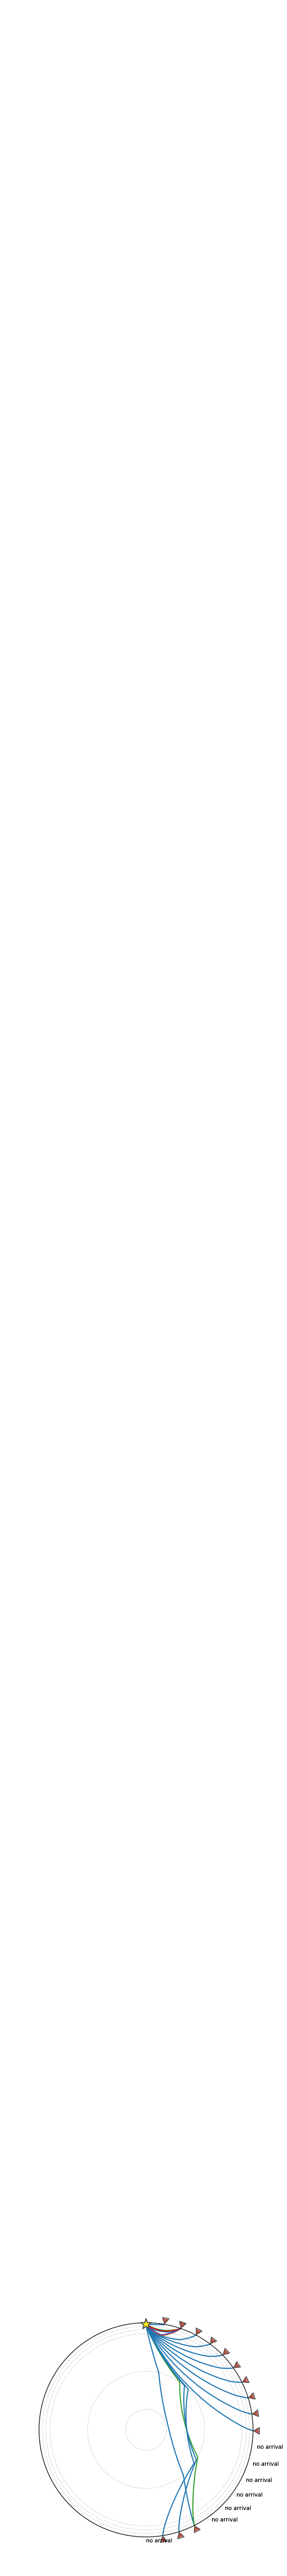

In [11]:
distances = np.linspace(10, 180, 20)
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
phases = ['P', 'PKP']
arrivals = model.get_ray_paths(100, 10, phase_list=phases)
axes = arrivals.plot(plot_type='spherical',
                  legend=False, label_arrivals=False,
                  show=False, ax=ax)
#print(type(ax.plot([],[])[0]))

def animate(i):
    #axes.lines.remove(axes.lines[1])
    arrivals = model.get_ray_paths(100, distances[i], phase_list=phases)
    if not len(arrivals):
        axes.add_artist(ax.text(np.deg2rad(distances[i]), 6371.*1.05, "no arrival"))
    else:      
        axes.add_artist(arrivals.plot(plot_type='spherical',
                  legend=False, label_arrivals=False,
                  show=False, ax=ax).lines[1])
    return axes


anim = FuncAnimation(fig, animate, np.arange(1, len(distances)),
                              interval=500, blit=False)
HTML(anim.to_html5_video())